In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style as st

In [92]:
titanic = pd.read_csv('D:\\habijabi\\titanic\\train.csv',index_col=0)
titanic.head()
#used col as index

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Titanic sailed with 891 people (by the data)

In [25]:
sur = titanic['Survived']
passed = 0
for i in sur:
    if i == 0:
        passed+=1
print(passed,'People died in titanic disaster')
sur = titanic['Survived']
survived = 0
for i in sur:
    if i == 1:
        survived+=1
print (survived,'People survived in titanic disaster' )

549 People died in titanic disaster
342 People survived in titanic disaster


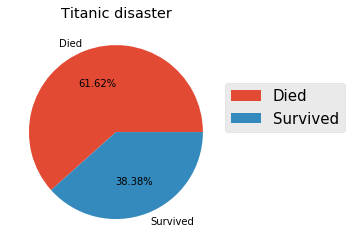

In [46]:
x = [passed,survived]
plt.pie(x,autopct="%0.2f%%",labels =['Died','Survived'])
plt.title('Titanic disaster')

plt.legend(loc = [1,0.5],fontsize = 15)
plt.show()

### That's mean most of the people died in Titanic disaster,but which kinda people died most??which cabins are they belonged to??and how were their gender differentiation??let's see what happens below!stay tuned

In [53]:
count = 0
for i in titanic['Cabin']:
    if i  == 0:
        count +=1           
print (count,"People have uknown CABIN no.")

count = 0
for i in titanic['Cabin']:
    if i  != 0:
        count +=1           
print (count,"People have known CABIN no.")

687 People have uknown CABIN no.
204 People have known CABIN no.


### The dataset could'n find many cabin no. But yeah that is not gonna affact our analysis as we have the classes of cabins and we can essily predict what happend.

In [55]:
age = titanic.iloc[:,4]
count = 0
valid_age = []
for i in age:
    if i != 0:
        count +=1
        valid_age.append(i)
        
print(count,'people have the age')

714 people have the age


### again here in this dataset some people's age are missing but we are going ahead

In [91]:
#valid_age from previous cell
age = np.array([valid_age])
age.sort()
#checking the range of ages of people
dcide = np.logical_and(age>=0.42,age<=20)
dcide = np.logical_and(age>20,age<=40)
dcide = np.logical_and(age>40,age<=60)
dcide = np.logical_and(age>61,age<=80)
count = 0
for i in dcide:
    for j in i:
        if j == True:
               count +=1
#count variable is common every where but its changing ,please skip that you can
count

19

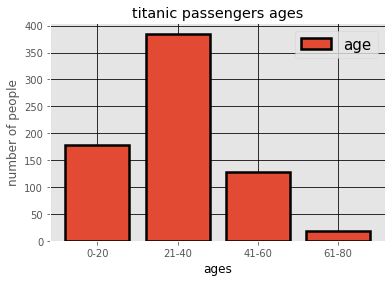

In [60]:
age_catagory =[179, 385 ,128 ,19]
x = ['0-20','21-40','41-60','61-80']

st.use('ggplot')

plt.bar(x,age_catagory,lw = 2.5,ec = 'k',label = 'age')

plt.title('titanic passengers ages')
plt.xlabel('ages',c= 'k')
plt.ylabel('number of people')
plt.legend(fontsize = 15)
plt.grid(c = 'k')
plt.show()

### so now we know how was the classification of passenger's ages.The most crowed range is 21-40 that means young most.and as usual old were the least

In [61]:
#there are three types of cabins so I tried to find them out specifically
class cabin_class:
    def three(self,count,cabin):
        for i in cabin:
            if i == 3:
                count += 1
        return count
    def two(self,count,cabin):
        for i in cabin:
            if i == 2:
                count += 1
        return count
    def one(self,count,cabin):
        for i in cabin:
            if i == 1:
                count += 1
        return count
count = 0
obj = cabin_class()
obj.three(count,titanic['Pclass'])
obj.two(count,titanic['Pclass'])
obj.one(count,titanic['Pclass'])

216

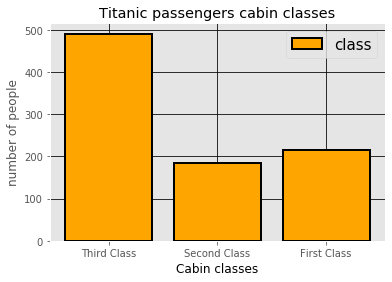

In [70]:
a = obj.three(count,titanic['Pclass'])
b = obj.two(count,titanic['Pclass'])
c = obj.one(count,titanic['Pclass'])
y = [a,b,c]
x = ["Third Class","Second Class",'First Class']
st.use('ggplot')

plt.bar(x,y,lw = 2,ec = 'k',label = 'class',color = 'orange')

plt.title('Titanic passengers cabin classes')
plt.xlabel('Cabin classes',c= 'k')
plt.ylabel('number of people')
plt.legend(fontsize = 15)
plt.grid(c = 'k')
plt.show()

### as you can see people were in third class cabins most .I donno why people didn't comfortable in second class cabins but the high classify people were in the first class cabins.Actually I saw that in The Titanic movie and it works here,I love Rose..

In [78]:
male_count = 0
female_count = 0
gender = titanic['Sex']
for i in gender:
    if i == 'male':
        male_count +=1
    if i == 'female':
        female_count +=1
#qountity of man and woman   
print(male_count,"man were there")
print(female_count,"woman were there")

#now find how much man and woman dies or survived
array = np.array(titanic[['Survived','Sex']])
logic = np.logical_and(titanic['Survived'] ==1,titanic['Sex'] == 'female')
i = np.array(logic)
count = 1
for i in i:
    if i == True:
        count += 1
print(count,'woman just survived')
# now we can essily find how much man died or survived 
# as we have all the informations of dying people
#male survived 110 and died 460
#female survived 234 and died 80

577 man were there
314 woman were there
234 woman just survived


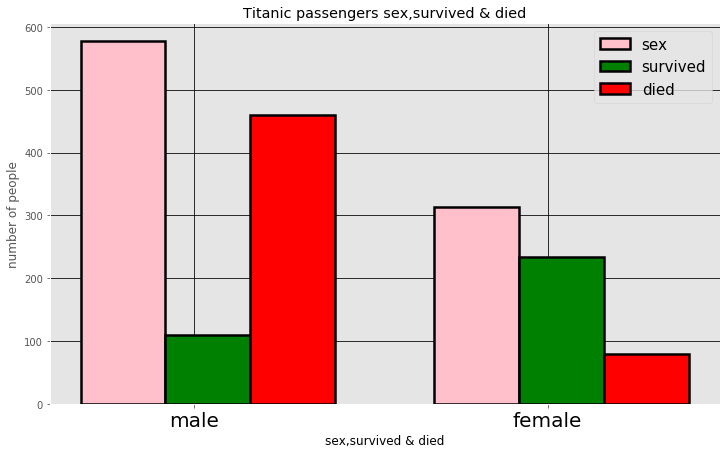

In [80]:
y =[ male_count,female_count]
x = ['male','female']
x_index = np.arange(len(x))
male_survived = 110
female_survived = 234
z = [male_survived,female_survived]
male_died = 460
female_died = 80
r = [male_died,female_died]
width = 0.24

plt.figure(figsize = (12,7))
st.use('ggplot')

plt.bar(x_index,y,width = width,lw = 2.5,ec = 'k',label = 'sex',color = 'pink')
plt.bar(x_index+width,z,width = width,lw = 2.5,ec = 'k',label = 'survived',color = 'g')
plt.bar(x_index+width+width,r,width = width,lw = 2.5,ec = 'k',label = 'died',color = 'r')

plt.xticks(x_index+0.2,x,fontsize = 20,c = 'k')

plt.title('Titanic passengers sex,survived & died',)
plt.xlabel('sex,survived & died',c= 'k')
plt.ylabel('number of people')
plt.legend(fontsize = 15)
plt.grid(c = 'k')
plt.show()

### so here is a simple but terrible visualization of dying people.There were male most and died male most but survived the least.On the other hand woman got more priority of getting save their life .Therefore woman survived and didn't lose their life many.
# so ledies first
### (On 'barchart' in the left everything is about male and the in the right everything is about woman)

In [86]:
#here is a code to calculate which cabins has most died and survived people
array = np.array(titanic[['Survived','Pclass']])
logic = np.logical_and(titanic['Survived'] == 0,titanic['Pclass'] ==1)
i = np.array(logic)
count = 1
for i in i:
    if i == True:
        count += 1
print (count,'people of first class died')
#so like before we can find the others possitions

81 people of first class died


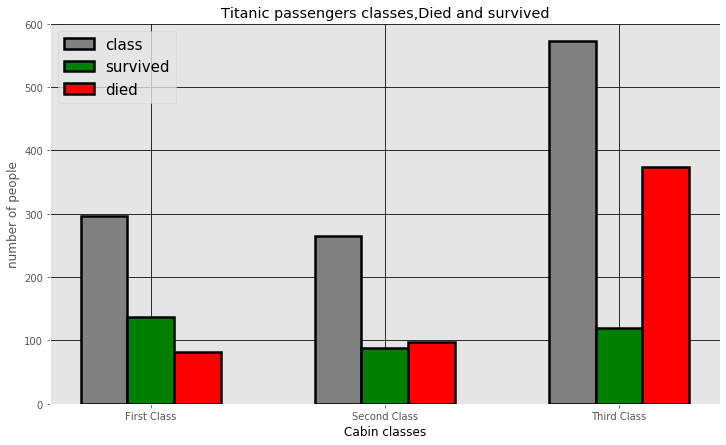

In [87]:
#first ,second and third class cabins people who either died or survived
first_survived  = 137
second_survived = 88
third_survived = 120
first_died = 81
second_died = 98
third_died = 373
z = [first_survived,second_survived,third_survived]
r = [first_died,second_died,third_died]

#now just add them together
a = obj.three(count,titanic['Pclass'])
b = obj.two(count,titanic['Pclass'])
c = obj.one(count,titanic['Pclass'])
y = [c,b,a]
x = ['First Class',"Second Class","Third Class"]
plt.figure(figsize = (12,7))
st.use('ggplot')
x_index = np.arange(len(x))
width = 0.2

plt.bar(x_index,y,lw = 2.5,width = width,ec = 'k',label = 'class',color = 'gray')
plt.bar(x_index+width,z,lw = 2.5,width = width,ec = 'k',label = 'survived',color = 'g')
plt.bar(x_index+width+width,r,lw = 2.5,width = width,ec = 'k',label = 'died',color = 'r')

plt.xticks(x_index+0.2,x)

plt.title('Titanic passengers classes,Died and survived')
plt.xlabel('Cabin classes',c= 'k')
plt.ylabel('number of people')
plt.legend(fontsize = 15)
plt.grid(c = 'k')
plt.show()

### Here is something we have to think,first class people got the best priority of getting boat to be saved but second and third classes people were helpless.We can see the huge different between first and third class.So if you have more mony in this world you will get more priority that what we see here.Logically everyone was passenger they needed to be helped.But in the third cabins people didn't get that even they were either male or female.
### This is the worst thing of Titanic disaster.I thought woman got priority first but that is a wrong term .The first class people got most priority whether mar or woman.So basically the chronological step of  priority First class ,second class then third class

In [90]:
# a new dataframe groupeby cabins
df =pd.DataFrame({
    'fclass':[137,81],
    'sclass':[88,98],
    'tclass':[120,373]},index= ['survived','died'])
df

,fclass,sclass,tclass
survived,137,88,120
died,81,98,373


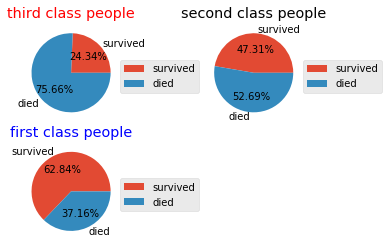

In [89]:
plt.subplot(2,2,1)
x = df['tclass']
st.use('ggplot')
plt.pie(x,autopct='%0.2f%%',labels=['survived','died'])
plt.title('third class people',c = 'r')

plt.legend(loc = [1,0.3])
plt.subplot(2,2,2)
x = df['sclass']
st.use('ggplot')
plt.pie(x,autopct='%0.2f%%',labels=['survived','died'])
plt.title('second class people')
plt.legend(loc = [1,0.3])
plt.subplot(2,2,3)
x = df['fclass']
st.use('ggplot')
plt.pie(x,autopct='%0.2f%%',labels=['survived','died'])
plt.title('first class people',c = 'b')
plt.legend(loc = [1,0.3])
plt.show()

### so here is clear scenario how people got priority to be saved  while Titanic was sinking.62% of the third cabins people died where the first cabins people died only 24% of their total.

# --------------------------Summary---------------------------
### In The Titanic there were 891 people(by the dataset).Most of the people were Man and then Woman.Most of the man died and then the woman.Most of the woman got more priority than the man.We did people classified by age avobe.The most crowed range was 21-40.And we have the classifications of cabins.Threre are three finda cabins 1st,2nd,3rd.
### Basically the first class cabins people got priority first among them the women got priority most to be safe.Then the second class people got priority and among them the woman got priority most to be safe and so on the third.

# so everything I said in this analysis based on my dataset,the real history might be like this and might not be